In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get data

In [52]:
df = pd.read_csv('/content/pet_adoption_center.csv')
df.head()

,pet_id,pet_name,species,breed,age_years,gender,color,arrival_date,adopted,adoption_date,adopter_id,adopter_name,adopter_age,adopter_city,adopter_previous_pets
0,P0001,Sandra,Dog,Yorkshire Terrier,2,Female,White,2024-10-10,True,2025-03-11,A0001,Megan Rogers,56,Mcgeestad,1
1,P0002,Brian,Cat,Tonkinese,1,Female,Golden,2023-09-09,True,2024-02-10,A0002,Jonathan Hawkins,18,Geneshire,2
2,P0003,Timothy,Bird,Amazon Parrot,4,Male,Spotted,2023-10-03,False,2023-10-17,NaN,NaN,-1,NaN,0
3,P0004,Karl,Dog,German Shepherd,1,Female,White,2024-07-28,True,2024-08-12,A0004,Natalie Rivera,51,North Richard,3
4,P0005,Sarah,Rabbit,Dutch,1,Female,Spotted,2024-02-21,False,2024-02-26,NaN,NaN,-1,NaN,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             118 non-null    object
 11  adopter_name           118 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           118 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
dtypes: bool(1), int64(3), o

#Handling some missing value

In [54]:
df.isnull().sum()

,0
pet_id,0
pet_name,0
species,0
breed,0
age_years,0
gender,0
color,0
arrival_date,0
adopted,0
adoption_date,0


In [55]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-55-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [56]:
df.isnull().sum()

,0
pet_id,0
pet_name,0
species,0
breed,0
age_years,0
gender,0
color,0
arrival_date,0
adopted,0
adoption_date,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pet_id                 200 non-null    object
 1   pet_name               200 non-null    object
 2   species                200 non-null    object
 3   breed                  200 non-null    object
 4   age_years              200 non-null    int64 
 5   gender                 200 non-null    object
 6   color                  200 non-null    object
 7   arrival_date           200 non-null    object
 8   adopted                200 non-null    bool  
 9   adoption_date          200 non-null    object
 10  adopter_id             200 non-null    object
 11  adopter_name           200 non-null    object
 12  adopter_age            200 non-null    int64 
 13  adopter_city           200 non-null    object
 14  adopter_previous_pets  200 non-null    int64 
dtypes: bool(1), int64(3), o

In [58]:
df['adopted'].value_counts()

,count
adopted,
True,118
False,82


# Data Visualization

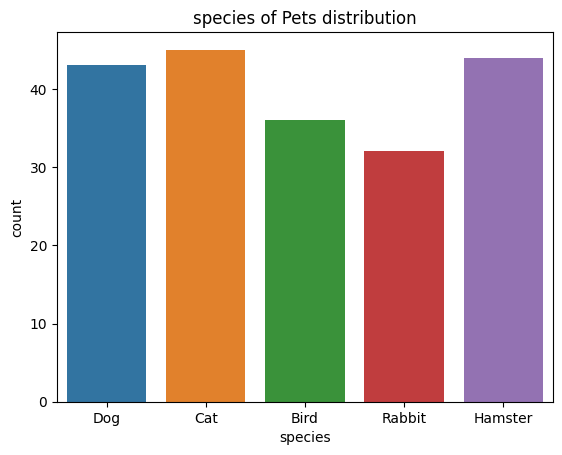

In [59]:
sns.countplot(data=df, x='species', hue = 'species')
plt.title('species of Pets distribution')
plt.xlabel('species')
plt.ylabel('count')
plt.show()

In [60]:
dog_breed = df[df['species'] == 'Dog']['breed'].value_counts().head(10)
cat_breed = df[df['species'] == 'Cat']['breed'].value_counts().head(10)
hamster_breed = df[df['species'] == 'Hamster']['breed'].value_counts().head(10)
brid_breed = df[df['species'] == 'Bird']['breed'].value_counts().head(10)
rabbit_breed = df[df['species'] == 'Rabbit']['breed'].value_counts().head(10)

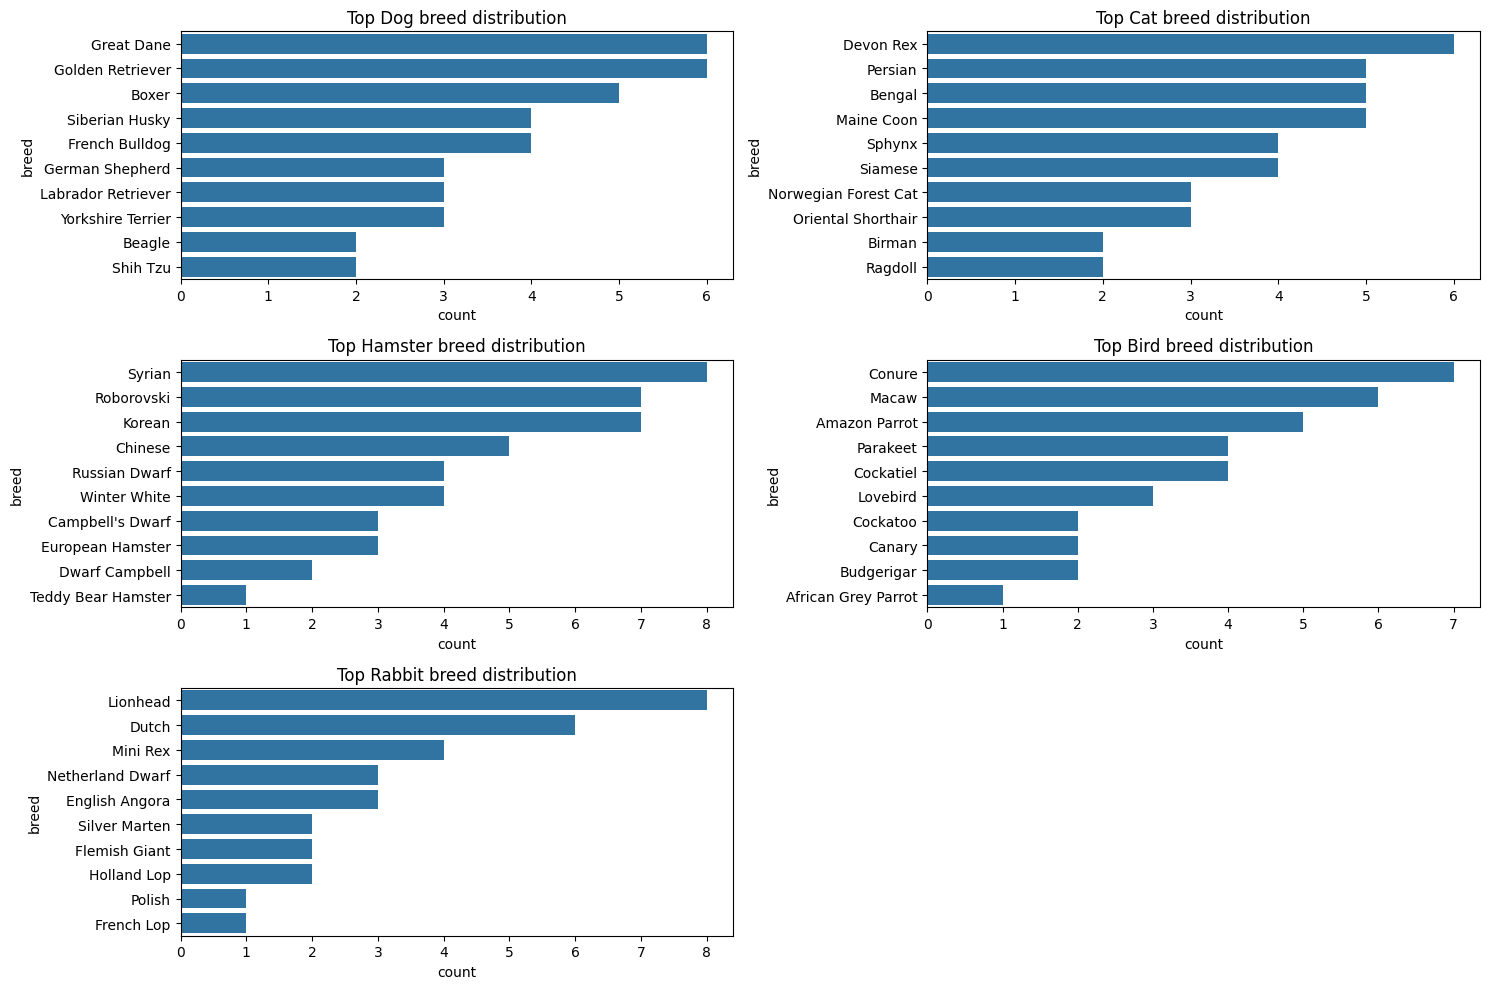

In [61]:

fig, axes = plt.subplots(3, 2, figsize=(15,10))

sns.barplot(x = dog_breed.values , y = dog_breed.index, ax = axes[0,0] )
axes[0,0].set_title( 'Top Dog breed distribution')
axes[0,0].set_xlabel('count')

sns.barplot(x = cat_breed.values , y = cat_breed.index, ax = axes[0,1] )
axes[0,1].set_title( 'Top Cat breed distribution')
axes[0,1].set_xlabel('count')

sns.barplot(x = hamster_breed.values , y = hamster_breed.index, ax = axes[1,0] )
axes[1,0].set_title( 'Top Hamster breed distribution')
axes[1,0].set_xlabel('count')

sns.barplot(x = brid_breed.values , y = brid_breed.index, ax = axes[1,1] )
axes[1,1].set_title( 'Top Bird breed distribution')
axes[1,1].set_xlabel('count')

sns.barplot(x = rabbit_breed.values , y = rabbit_breed.index, ax = axes[2,0] )
axes[2,0].set_title( 'Top Rabbit breed distribution')
axes[2,0].set_xlabel('count')

axes[2,1].axis('off')
plt.tight_layout()
plt.show()

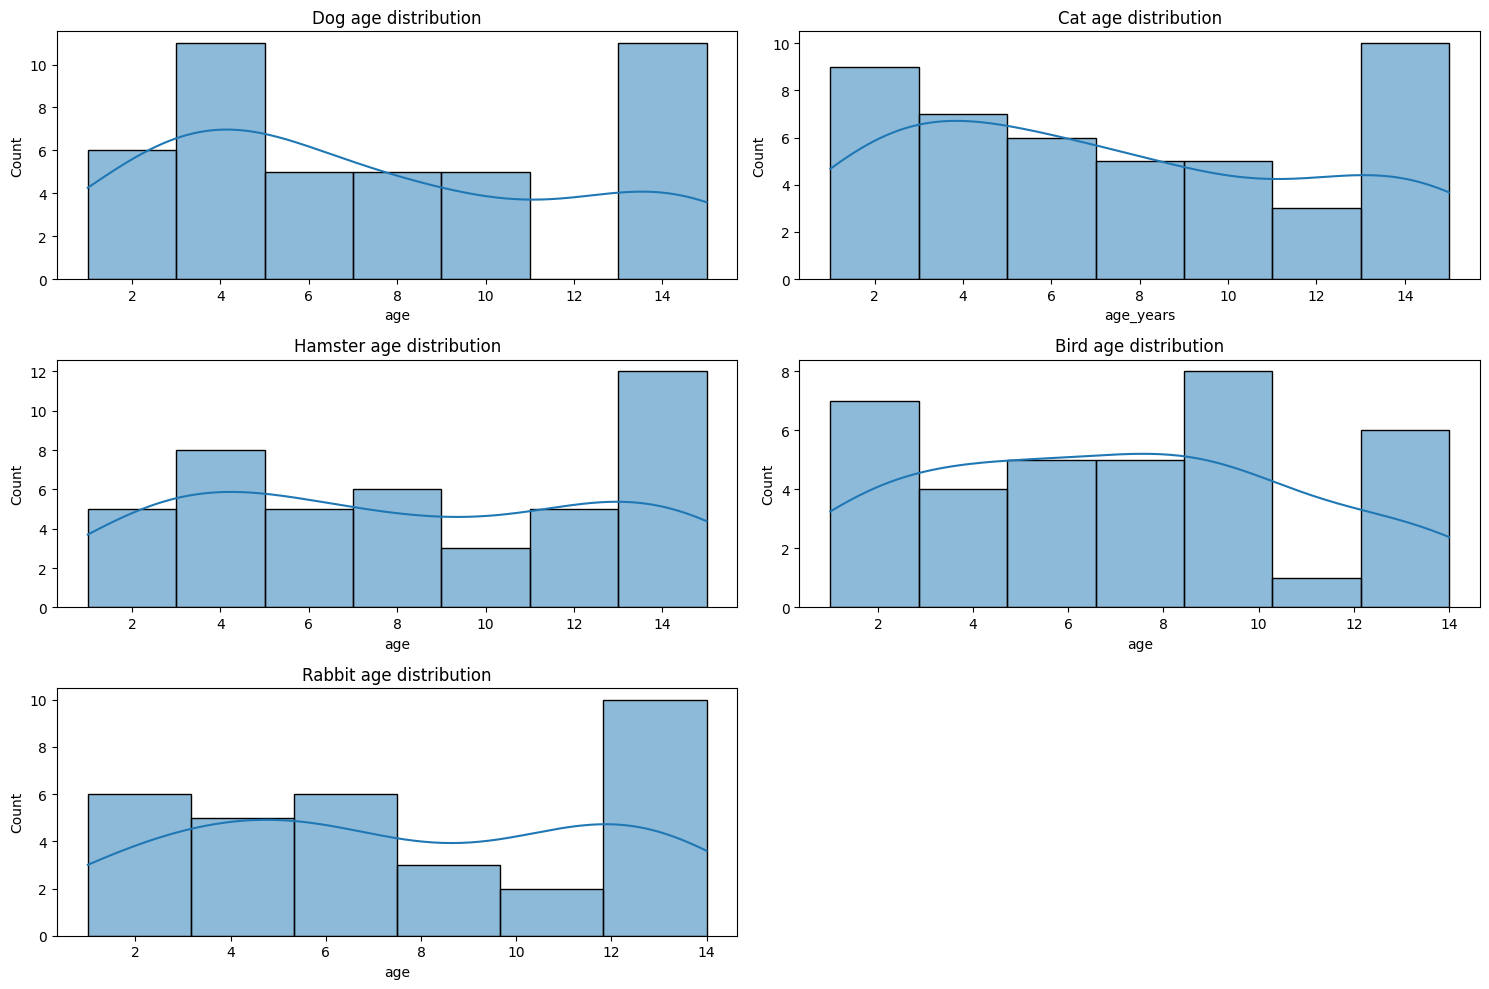

In [62]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))

sns.histplot(df[df['species'] == 'Dog'], x = 'age_years', kde = True, bins = 'auto', ax = axes[0,0])
axes[0,0].set_title( 'Dog age distribution')
axes[0,0].set_xlabel('age')

sns.histplot(df[df['species'] == 'Cat'], x = 'age_years', kde = True, bins = 'auto', ax = axes[0,1])
axes[0,1].set_title( 'Cat age distribution')
axes[0,1].set_xlabel

sns.histplot(df[df['species'] == 'Hamster'], x = 'age_years', kde = True, bins = 'auto', ax = axes[1,0])
axes[1,0].set_title( 'Hamster age distribution')
axes[1,0].set_xlabel('age')

sns.histplot(df[df['species'] == 'Bird'], x = 'age_years', kde = True, bins = 'auto', ax = axes[1,1])
axes[1,1].set_title( 'Bird age distribution')
axes[1,1].set_xlabel('age')

sns.histplot(df[df['species'] == 'Rabbit'], x = 'age_years', kde = True, bins = 'auto', ax = axes[2,0])
axes[2,0].set_title( 'Rabbit age distribution')
axes[2,0].set_xlabel('age')

axes[2,1].axis('off')
plt.tight_layout()
plt.show()

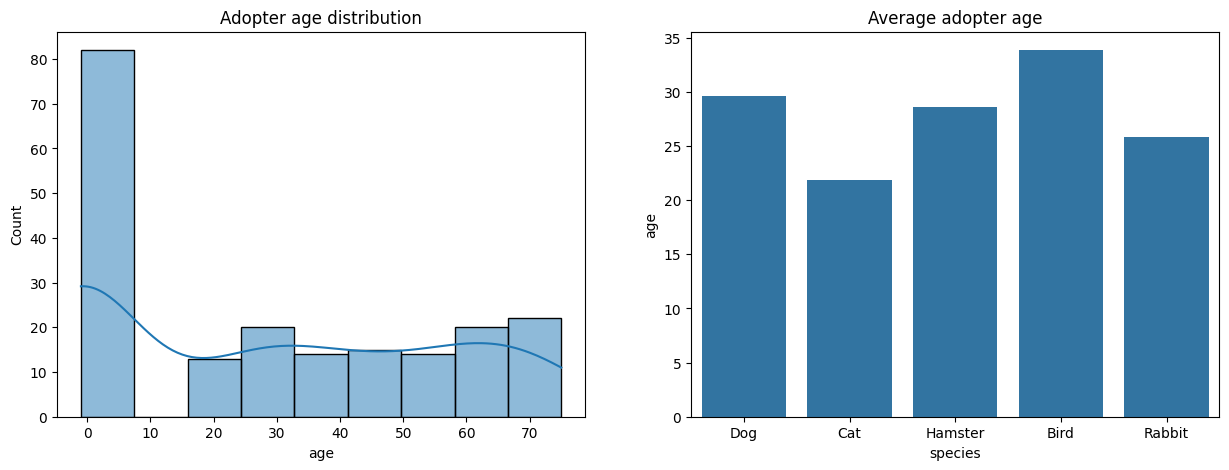

In [63]:
avg_adopter_age_dog = df[df['species'] == 'Dog']['adopter_age'].mean()
avg_adopter_age_cat = df[df['species'] == 'Cat']['adopter_age'].mean()
avg_adopter_age_hamster = df[df['species'] == 'Hamster']['adopter_age'].mean()
avg_adopter_age_bird = df[df['species'] == 'Bird']['adopter_age'].mean()
avg_adopter_age_rabbit = df[df['species'] == 'Rabbit']['adopter_age'].mean()

plt.figure(figsize = (15,5))

plt.subplot(1,2, 1)
sns.histplot(df, x = 'adopter_age', kde = True, bins = 'auto')
plt.title('Adopter age distribution')
plt.xlabel('age')

plt.subplot(1,2, 2)
sns.barplot(x = ['Dog', 'Cat', 'Hamster', 'Bird', 'Rabbit'], y = [avg_adopter_age_dog, avg_adopter_age_cat, avg_adopter_age_hamster, avg_adopter_age_bird,
                                                                  avg_adopter_age_rabbit])
plt.title('Average adopter age')
plt.xlabel('species')
plt.ylabel('age')
plt.show()

In [64]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['adoption_date'] = pd.to_datetime(df['adoption_date'])
df['days_to_adoption'] = (df['adoption_date'] - df['arrival_date']).dt.days
display(df[['arrival_date', 'adoption_date', 'days_to_adoption']].head())

,arrival_date,adoption_date,days_to_adoption
0,2024-10-10,2025-03-11,152
1,2023-09-09,2024-02-10,154
2,2023-10-03,2023-10-17,14
3,2024-07-28,2024-08-12,15
4,2024-02-21,2024-02-26,5


Text(0.5, 0, 'days')

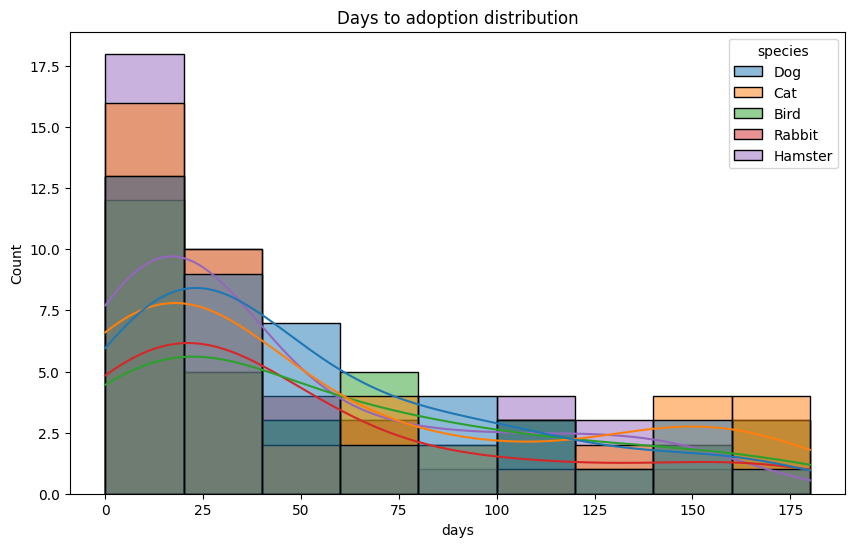

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x = 'days_to_adoption', hue = 'species', kde = True, bins = 'auto')
plt.title('Days to adoption distribution')
plt.xlabel('days')

In [66]:
df['adopter_city'].nunique()

117

In [67]:
df['adopter_id'].nunique()

118

In [68]:
df['adopted'] = df['adopted'].astype(int)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   pet_id                 200 non-null    object        
 1   pet_name               200 non-null    object        
 2   species                200 non-null    object        
 3   breed                  200 non-null    object        
 4   age_years              200 non-null    int64         
 5   gender                 200 non-null    object        
 6   color                  200 non-null    object        
 7   arrival_date           200 non-null    datetime64[ns]
 8   adopted                200 non-null    int64         
 9   adoption_date          200 non-null    datetime64[ns]
 10  adopter_id             200 non-null    object        
 11  adopter_name           200 non-null    object        
 12  adopter_age            200 non-null    int64         
 13  adopt

In [70]:
new_df = df[['species', 'age_years', 'gender', 'color', 'adopted', 'adopter_age', 'adopter_previous_pets', 'days_to_adoption']]
new_df.head()

,species,age_years,gender,color,adopted,adopter_age,adopter_previous_pets,days_to_adoption
0,Dog,2,Female,White,1,56,1,152
1,Cat,1,Female,Golden,1,18,2,154
2,Bird,4,Male,Spotted,0,-1,0,14
3,Dog,1,Female,White,1,51,3,15
4,Rabbit,1,Female,Spotted,0,-1,0,5


# Feature selection and Encoding categorical feature

In [71]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder
for col in ['species', 'gender', 'color']:
  le = LabelEncoder()
  new_df[col] = le.fit_transform(new_df[col])



/tmp/ipython-input-71-2257717030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
/tmp/ipython-input-71-2257717030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
/tmp/ipython-input-71-2257717030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [72]:
new_df.head()

,species,age_years,gender,color,adopted,adopter_age,adopter_previous_pets,days_to_adoption
0,2,2,0,6,1,56,1,152
1,1,1,0,2,1,18,2,154
2,0,4,1,5,0,-1,0,14
3,2,1,0,6,1,51,3,15
4,4,1,0,5,0,-1,0,5


In [73]:
from sklearn.feature_selection import VarianceThreshold

# feature selection
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(new_df)

print("Selected feature:", new_df.columns[selector.get_support()])

Selected feature: Index(['species', 'age_years', 'gender', 'color', 'adopted', 'adopter_age',
       'adopter_previous_pets', 'days_to_adoption'],
      dtype='object')


In [74]:
X = new_df.drop(['adopted'], axis = 1)
y = new_df['adopted']


In [75]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('dt', dt), ('rf', rf)],
    voting='hard'
)

voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [78]:
# predict
y_pred = voting_clf.predict(X_test)



In [79]:
print(y_pred[:10])

[1 1 1 1 0 0 1 0 0 1]


In [80]:
for pred, actual in zip(y_pred[:10], y_test[:10]):
    print(f"Prediction: {pred} | Actual: {actual}")


Prediction: 1 | Actual: 1
Prediction: 1 | Actual: 1
Prediction: 1 | Actual: 1
Prediction: 1 | Actual: 1
Prediction: 0 | Actual: 0
Prediction: 0 | Actual: 0
Prediction: 1 | Actual: 1
Prediction: 0 | Actual: 0
Prediction: 0 | Actual: 0
Prediction: 1 | Actual: 1


In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
 [[15  0]
 [ 0 25]]
